# Problem

Solve $$\nabla^2\psi = - 2\pi^2\sin\pi x\sin\pi y \quad\text{in } 0\le x\le 1, 0 \le y \le 1,$$ with boundary condition $\psi = 0$ on $x = 0$ and $1$ and $y = 0$ and $1$.

The analytic solution is $$\psi = \sin\pi x\sin\pi y$$

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Setup

In [2]:
N = 20
nx = N + 1
ny = N + 1 # = nx

h = 1 / N

# SOR parameter
r = 2 / (1 + np.pi / N) # optimal value

psi = np.zeros((nx, ny)) # streamfunction

# Initialize grid and the value of the vorticity on it
x_grid, y_grid = np.meshgrid(np.linspace(0, 1, nx), np.linspace(0, 1, ny))
w = 2 * np.pi ** 2 * np.sin(np.pi * x_grid) * np.sin(np.pi * y_grid) # vorticity

In [3]:
# Alternative initialization
# w = np.zeros((nx, ny))
# for i in range(nx):
#     for j in range(ny):
#         w[i, j] = 2 * (np.pi ** 2) * np.sin(np.pi * i * h) * np.sin(np.pi * j * h)

In [4]:
%%time
N_ITERATIONS = 4 * nx

for iteration in range(1, N_ITERATIONS + 1):
    for i in range(1, nx - 1):
        for j in range(1, ny - 1):
            psi[i, j] = (1 - r) * psi[i, j] + r * (
                psi[i - 1, j] + psi[i + 1, j] + psi[i, j - 1] + psi[i, j + 1] + w[i, j] * h ** 2
            ) / 4
    
    print(f"iteration={iteration}; psi(0.5, 0.5) = {psi[nx // 2, ny // 2]}")

iteration=1; psi(0.5, 0.5) = 0.11172552248786134
iteration=2; psi(0.5, 0.5) = 0.21474087386187135
iteration=3; psi(0.5, 0.5) = 0.30997552024442987
iteration=4; psi(0.5, 0.5) = 0.39788696256516143
iteration=5; psi(0.5, 0.5) = 0.47880196881231946
iteration=6; psi(0.5, 0.5) = 0.5529890863508748
iteration=7; psi(0.5, 0.5) = 0.6207061531268332
iteration=8; psi(0.5, 0.5) = 0.6822151831901544
iteration=9; psi(0.5, 0.5) = 0.7377909294427685
iteration=10; psi(0.5, 0.5) = 0.7877217669442478
iteration=11; psi(0.5, 0.5) = 0.8312664121411968
iteration=12; psi(0.5, 0.5) = 0.8675870198390814
iteration=13; psi(0.5, 0.5) = 0.8971068057797567
iteration=14; psi(0.5, 0.5) = 0.9207474719786979
iteration=15; psi(0.5, 0.5) = 0.9394115200053933
iteration=16; psi(0.5, 0.5) = 0.9539354915518791
iteration=17; psi(0.5, 0.5) = 0.9650542801885676
iteration=18; psi(0.5, 0.5) = 0.9734062008490781
iteration=19; psi(0.5, 0.5) = 0.9795357489944583
iteration=20; psi(0.5, 0.5) = 0.9839038322339034
iteration=21; psi(0.5, 0

In [5]:
abs_err = 0;
for i in range(nx):
    for j in range(ny):
        abs_err = max(abs(psi[i, j] - np.sin(np.pi * i * h) * np.sin(np.pi * j * h)), abs_err)

print(f"iteration={iteration}; abs_err = {abs_err}; psi(0.5, 0.5) = {psi[nx // 2, ny // 2]}")

iteration=84; abs_err = 0.0020587065214785483; psi(0.5, 0.5) = 1.0020587065214785


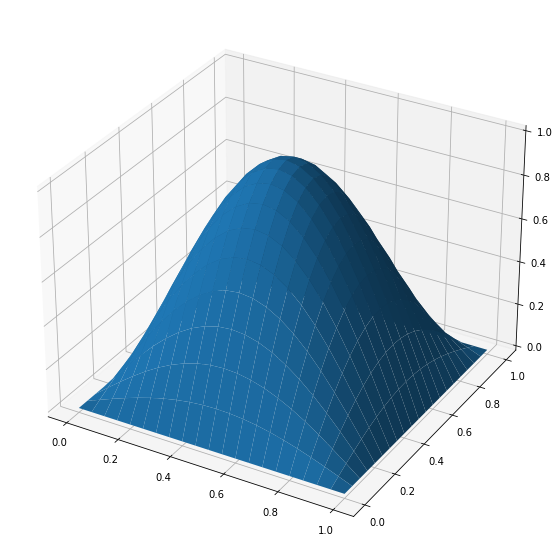

In [6]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

# Plot the surface
ax.plot_surface(x_grid, y_grid, psi)

plt.show()

In [7]:
y_grid[:, 0]

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

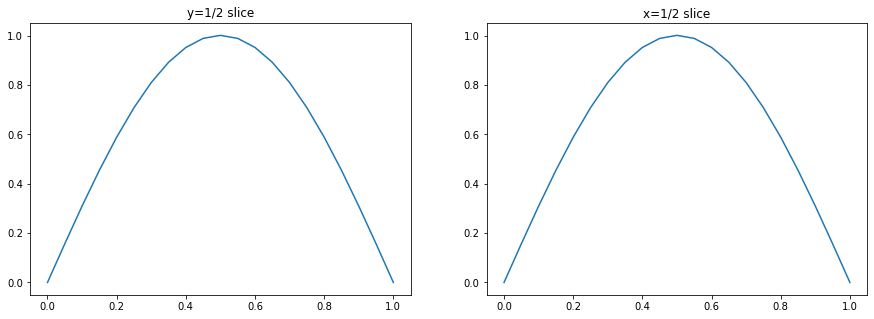

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot the surface
ax1.plot(x_grid[0, :], psi[:, ny // 2])
ax1.set_title("y=1/2 slice")
ax2.plot(y_grid[:, 0], psi[nx // 2, :])
ax2.set_title("x=1/2 slice")

plt.show()

In [9]:
max_location = np.unravel_index(psi.argmax(), psi.shape)
max_location, psi[max_location]

((10, 10), 1.0020587065214785)

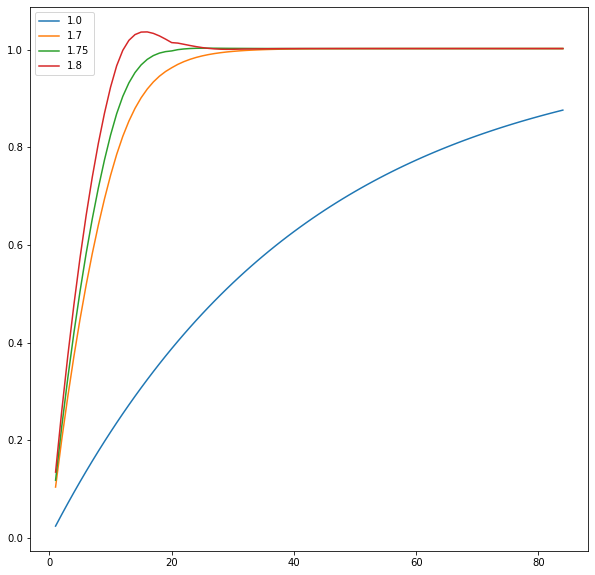

In [10]:
plt.figure(figsize=(10, 10))

for r_value in [1.0, 1.7, 1.75, 1.8]:
    psi = np.zeros((nx, ny))
    tmp = []
    for iteration in range(1, N_ITERATIONS + 1):
        for i in range(1, nx - 1):
            for j in range(1, ny - 1):
                psi[i, j] = (1 - r_value) * psi[i, j] + r_value * (
                    psi[i - 1, j] + psi[i + 1, j] + psi[i, j - 1] + psi[i, j + 1] + w[i, j] * h ** 2
                ) / 4
                
        tmp.append(psi[nx // 2, ny // 2])
    
    plt.plot(np.arange(1, N_ITERATIONS + 1), tmp, label=r_value)

plt.legend()
plt.show()    

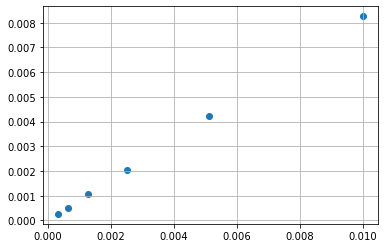

CPU times: user 5.43 s, sys: 9.59 ms, total: 5.44 s
Wall time: 5.62 s


In [11]:
%%time
tmp = []
N_values = np.array([10, 14, 20, 28, 40, 56])
for N_value in N_values:
    nx = N_value + 1
    ny = N_value + 1 # = nx

    h = 1 / N_value

    # SOR parameter
    r = 2 / (1 + np.pi / N_value) # optimal value

    psi = np.zeros((nx, ny)) # streamfunction

    # Initialize grid and the value of the vorticity on it
    x_grid, y_grid = np.meshgrid(np.linspace(0, 1, nx), np.linspace(0, 1, ny))
    w = 2 * np.pi ** 2 * np.sin(np.pi * x_grid) * np.sin(np.pi * y_grid) # vorticity
    
    num_iter = 4 * nx
    for iteration in range(1, num_iter + 1):
        for i in range(1, nx - 1):
            for j in range(1, ny - 1):
                psi[i, j] = (1 - r) * psi[i, j] + r * (
                    psi[i - 1, j] + psi[i + 1, j] + psi[i, j - 1] + psi[i, j + 1] + w[i, j] * h ** 2
                ) / 4
                
    
    abs_err = 0;
    for i in range(nx):
        for j in range(ny):
            abs_err = max(abs(psi[i, j] - np.sin(np.pi * i * h) * np.sin(np.pi * j * h)), abs_err)
    tmp.append(abs_err)
    
plt.scatter(1 / N_values ** 2, tmp)
plt.grid()
# plt.legend()
plt.show()    

In [12]:
(slope, intercept), fit_errors = np.polyfit(1 / N_values ** 2, tmp, deg=1, cov=True)
print(f"Estimated slope is: {slope} +- {fit_errors[0, 0]}")

Estimated slope is: 0.8266454123824679 +- 2.78416382518097e-07


# Checks

First check $\psi = 0$ for $\omega = 0$:

In [13]:
N = 20
nx = N + 1
ny = N + 1 # = nx

h = 1 / N

# SOR parameter
r = 2 / (1 + np.pi / N) # optimal value

psi = np.zeros((nx, ny)) # streamfunction

w = np.zeros_like(psi) # vorticity

In [14]:
%%time
N_ITERATIONS = 4 * nx

for iteration in range(1, N_ITERATIONS + 1):
    for i in range(1, nx - 1):
        for j in range(1, ny - 1):
            psi[i, j] = (1 - r) * psi[i, j] + r * (
                psi[i - 1, j] + psi[i + 1, j] + psi[i, j - 1] + psi[i, j + 1] + w[i, j] * h ** 2
            ) / 4
    
    print(f"iteration={iteration}; psi(0.5, 0.5) = {psi[nx // 2, ny // 2]}")

(psi == 0).all() # Evaluates to true, good

iteration=1; psi(0.5, 0.5) = 0.0
iteration=2; psi(0.5, 0.5) = 0.0
iteration=3; psi(0.5, 0.5) = 0.0
iteration=4; psi(0.5, 0.5) = 0.0
iteration=5; psi(0.5, 0.5) = 0.0
iteration=6; psi(0.5, 0.5) = 0.0
iteration=7; psi(0.5, 0.5) = 0.0
iteration=8; psi(0.5, 0.5) = 0.0
iteration=9; psi(0.5, 0.5) = 0.0
iteration=10; psi(0.5, 0.5) = 0.0
iteration=11; psi(0.5, 0.5) = 0.0
iteration=12; psi(0.5, 0.5) = 0.0
iteration=13; psi(0.5, 0.5) = 0.0
iteration=14; psi(0.5, 0.5) = 0.0
iteration=15; psi(0.5, 0.5) = 0.0
iteration=16; psi(0.5, 0.5) = 0.0
iteration=17; psi(0.5, 0.5) = 0.0
iteration=18; psi(0.5, 0.5) = 0.0
iteration=19; psi(0.5, 0.5) = 0.0
iteration=20; psi(0.5, 0.5) = 0.0
iteration=21; psi(0.5, 0.5) = 0.0
iteration=22; psi(0.5, 0.5) = 0.0
iteration=23; psi(0.5, 0.5) = 0.0
iteration=24; psi(0.5, 0.5) = 0.0
iteration=25; psi(0.5, 0.5) = 0.0
iteration=26; psi(0.5, 0.5) = 0.0
iteration=27; psi(0.5, 0.5) = 0.0
iteration=28; psi(0.5, 0.5) = 0.0
iteration=29; psi(0.5, 0.5) = 0.0
iteration=30; psi(0.5, 

True

Now check the sweeping direction:

In [15]:
N = 20
nx = N + 1
ny = N + 1 # = nx

h = 1 / N

# SOR parameter
r = 2 / (1 + np.pi / N) # optimal value

psi = np.zeros((nx, ny)) # streamfunction

# Initialize grid and the value of the vorticity on it
x_grid, y_grid = np.meshgrid(np.linspace(0, 1, nx), np.linspace(0, 1, ny))
w = 2 * np.pi ** 2 * np.sin(np.pi * x_grid) * np.sin(np.pi * y_grid) # vorticity


N_ITERATIONS = 4 * nx

for iteration in range(1, N_ITERATIONS + 1):
    for j in range(1, ny - 1):
        for i in range(1, nx - 1):
            psi[i, j] = (1 - r) * psi[i, j] + r * (
                psi[i - 1, j] + psi[i + 1, j] + psi[i, j - 1] + psi[i, j + 1] + w[i, j] * h ** 2
            ) / 4
    
    print(f"iteration={iteration}; psi(0.5, 0.5) = {psi[nx // 2, ny // 2]}")

(psi == 0).all() # Evaluates to true, good

iteration=1; psi(0.5, 0.5) = 0.11172552248786134
iteration=2; psi(0.5, 0.5) = 0.21474087386187135
iteration=3; psi(0.5, 0.5) = 0.30997552024442987
iteration=4; psi(0.5, 0.5) = 0.39788696256516143
iteration=5; psi(0.5, 0.5) = 0.47880196881231946
iteration=6; psi(0.5, 0.5) = 0.5529890863508748
iteration=7; psi(0.5, 0.5) = 0.6207061531268332
iteration=8; psi(0.5, 0.5) = 0.6822151831901544
iteration=9; psi(0.5, 0.5) = 0.7377909294427685
iteration=10; psi(0.5, 0.5) = 0.7877217669442478
iteration=11; psi(0.5, 0.5) = 0.8312664121411968
iteration=12; psi(0.5, 0.5) = 0.8675870198390814
iteration=13; psi(0.5, 0.5) = 0.8971068057797567
iteration=14; psi(0.5, 0.5) = 0.9207474719786979
iteration=15; psi(0.5, 0.5) = 0.9394115200053933
iteration=16; psi(0.5, 0.5) = 0.9539354915518791
iteration=17; psi(0.5, 0.5) = 0.9650542801885676
iteration=18; psi(0.5, 0.5) = 0.9734062008490781
iteration=19; psi(0.5, 0.5) = 0.9795357489944583
iteration=20; psi(0.5, 0.5) = 0.9839038322339034
iteration=21; psi(0.5, 0

False

In [16]:
abs_err = 0;
for i in range(nx):
    for j in range(ny):
        abs_err = max(abs(psi[i, j] - np.sin(np.pi * i * h) * np.sin(np.pi * j * h)), abs_err)

print(f"iteration={iteration}; abs_err = {abs_err}; psi(0.5, 0.5) = {psi[nx // 2, ny // 2]}")

iteration=84; abs_err = 0.0020587065214785483; psi(0.5, 0.5) = 1.0020587065214785


iteration=84; abs_err = 0.0020587065214785483; psi(0.5, 0.5) = 1.0020587065214785

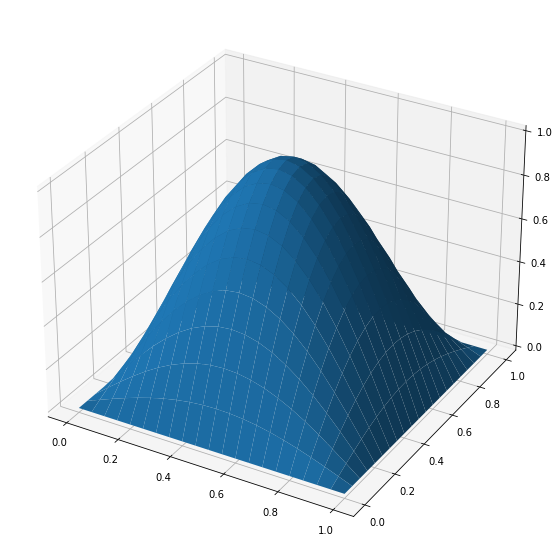

In [17]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

# Plot the surface
ax.plot_surface(x_grid, y_grid, psi)

plt.show()

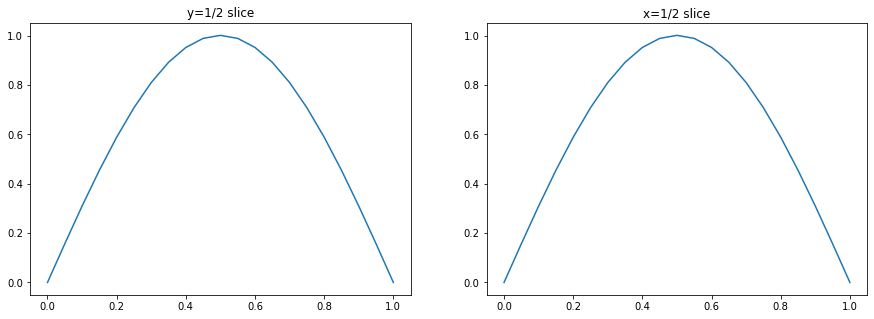

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot the surface
ax1.plot(x_grid[0, :], psi[:, ny // 2])
ax1.set_title("y=1/2 slice")
ax2.plot(y_grid[:, 0], psi[nx // 2, :])
ax2.set_title("x=1/2 slice")

plt.show()

In [19]:
max_location = np.unravel_index(psi.argmax(), psi.shape)
max_location, psi[max_location]

((10, 10), 1.0020587065214785)

((10, 10), 1.0020587065214785)

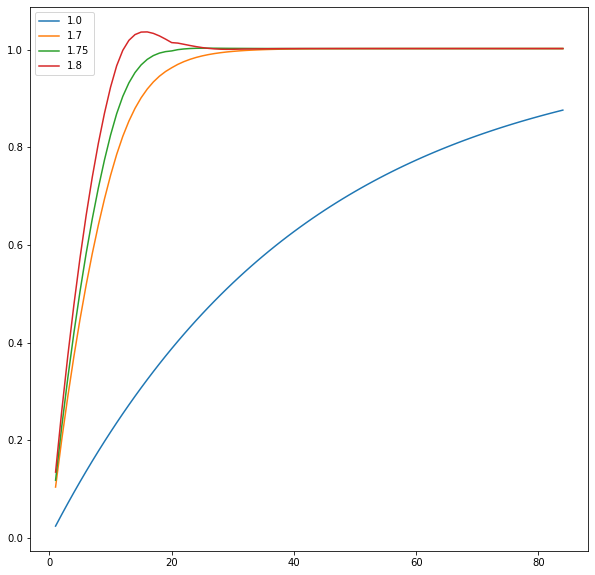

In [20]:
plt.figure(figsize=(10, 10))

for r_value in [1.0, 1.7, 1.75, 1.8]:
    psi = np.zeros((nx, ny))
    tmp = []
    for iteration in range(1, N_ITERATIONS + 1):
        for j in range(1, ny - 1):
            for i in range(1, nx - 1):
                psi[i, j] = (1 - r_value) * psi[i, j] + r_value * (
                    psi[i - 1, j] + psi[i + 1, j] + psi[i, j - 1] + psi[i, j + 1] + w[i, j] * h ** 2
                ) / 4
                
        tmp.append(psi[nx // 2, ny // 2])
    
    plt.plot(np.arange(1, N_ITERATIONS + 1), tmp, label=r_value)

plt.legend()
plt.show()    

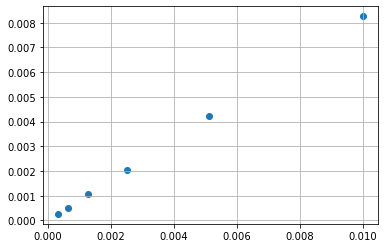

CPU times: user 5.67 s, sys: 3.29 ms, total: 5.67 s
Wall time: 5.67 s


In [21]:
%%time
tmp = []
N_values = np.array([10, 14, 20, 28, 40, 56])
for N_value in N_values:
    nx = N_value + 1
    ny = N_value + 1 # = nx

    h = 1 / N_value

    # SOR parameter
    r = 2 / (1 + np.pi / N_value) # optimal value

    psi = np.zeros((nx, ny)) # streamfunction

    # Initialize grid and the value of the vorticity on it
    x_grid, y_grid = np.meshgrid(np.linspace(0, 1, nx), np.linspace(0, 1, ny))
    w = 2 * np.pi ** 2 * np.sin(np.pi * x_grid) * np.sin(np.pi * y_grid) # vorticity
    
    num_iter = 4 * nx
    for iteration in range(1, num_iter + 1):
        for j in range(1, ny - 1):
            for i in range(1, nx - 1):
                psi[i, j] = (1 - r) * psi[i, j] + r * (
                    psi[i - 1, j] + psi[i + 1, j] + psi[i, j - 1] + psi[i, j + 1] + w[i, j] * h ** 2
                ) / 4
                
    
    abs_err = 0;
    for i in range(nx):
        for j in range(ny):
            abs_err = max(abs(psi[i, j] - np.sin(np.pi * i * h) * np.sin(np.pi * j * h)), abs_err)
    tmp.append(abs_err)
    
plt.scatter(1 / N_values ** 2, tmp)
plt.grid()
# plt.legend()
plt.show()    

In [22]:
(slope, intercept), fit_errors = np.polyfit(1 / N_values ** 2, tmp, deg=1, cov=True)
print(f"Estimated slope is: {slope} +- {fit_errors[0, 0]}")

Estimated slope is: 0.8266454123824679 +- 2.78416382518097e-07


Estimated slope is: 0.8266454123824679 +- 2.78416382518097e-07